# Algorytmy macierzowe - mnożenie macierzy rzadkich
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 1**

*Temat:* Proszę napisać kompresję macierzy do formatu koordynatów i przemnozyć ją przez wektor gęsty. Mnożenie ma być z możliwie najmniejszym kosztem. Porównać z klasycznym mnożeniem macierzy.

Treść ćwiczenia:

1. Informacje o rozmiarach swoich macierzy A i B (w jaki sposób zostały one wygenerowane skryptem mass matrix) 
2. Proszę narysować macierz A, B oraz C=A*B używając spy(A), spy(B) i spy(A*B) 
3. Proszę zmierzyć czas mnożenia macierzy A*B używając swojego programu z Zadania 1 
4. Proszę przekonwertować macierz A (i ewentualnie B)  do stosownego formatu rzadkiego.  
5. Proszę umieścić i opisać kod użyty do konwersji 
6. Bardzo proszę napisać mnożenie macierzy o możliwie najmniejszym koszcie 
7. Proszę umieścić i opisać kod użyty do mnożenia przekonwertowanych macierzy 
8. Proszę zmierzyć czas mnożenia przekonwertownych macierzy A*B

In [237]:
import numpy as np
import matplotlib.pyplot as plt

### Ad. 1
Jako macierz A wybraliśmy macierz wygenerowaną przez podany na zajęciach skrypt `massmatrix.m`. W tym celu użyliśmy funkcji `massmatrix(2,6,2,2)`, która ma rozmiar 100x100. Następnie wyniki zapisaliśmy w pliku o formacie csv. Poniższy kod wczytuje obie macierze jako `np.array` 

Następnie powiększyliśmy wejściową macierz poprzez powtórzenie. Otrzymaliśmy macierz 3200x3200. 

Macierz B stanowi macierz gęsta o długości 3200 z losowo wylosowanymi wartościami z przedziału (0,1).

In [238]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [239]:
def scale_matrix(A, q):
    B = np.vstack([A]*q)
    C = np.hstack([B]*q)
    return C

In [240]:
A = scale_matrix(get_matrix_from_csv("rigas/riga100.csv"), 128)
B = np.random.rand(A.shape[0], 1)

print(A.shape, B.shape)

(12800, 12800) (12800, 1)


In [241]:
print(f"Procent niezerowych pól macierzy A: {100*np.count_nonzero(A)/(A.shape[0])**2} %")

Procent niezerowych pól macierzy A: 16.0 %


### Ad. 2
Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową. Do mnożenia macierzy wykorzystano wbudowany w bibliotekę numpy znak mnożenia macierzy.

(Być może zdanie do zmiany): Przedstawiono jedynie fragment macierzy B i C, ponieważ były zbyt długie, aby przedstawić je w formie jednego paska 

In [242]:
def spy(matrix, plot):
    mask = matrix == 0
    if matrix.shape[1] == 1:
        #plot.set_xticklabels(['', '0', '', '', '', '1'])
        plot.matshow(mask, aspect=0.001)
    else:
        plot.matshow(mask, aspect='auto')

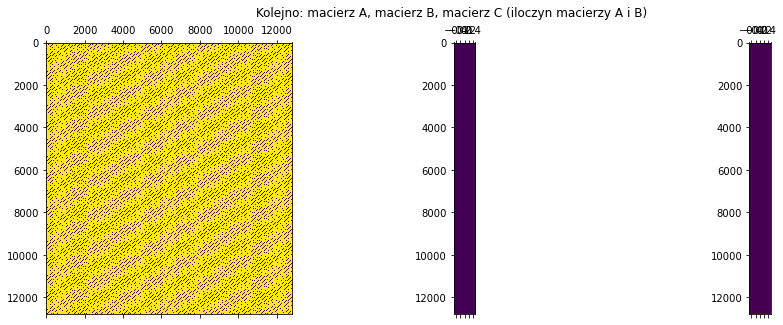

In [243]:
C = A@B
    
fig, (plot_1, plot_2, plot_3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Kolejno: macierz A, macierz B, macierz C (iloczyn macierzy A i B)')

spy(A, plot_1)
spy(B, plot_2)
spy(C, plot_3)

## Ad. 3
Poniżej przedstawiono klasyczny program do mnożenia macierzy, który został użyty w zadaniu 1 

In [244]:
def multi_pji(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for j in range(n):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]


def mat_mul(A, B, A_size=np.size(A, 0), mul_func=multi_pji):
    C = np.zeros((A_size, np.size(B, 1)))
    mul_func(A, B, C)
    return C

Jego wydajność zbadamy za pomocą funkcji, która bada czas 5 wykonań funkcji

In [245]:
from time import time

def log_time(func, message):
    number_of_tests = 5
    exec_times = []
    for _ in range(number_of_tests):
        t1 = time()
        func()
        t2 = time()
        exec_times.append(round(t2 - t1, 5))
    
    avg_time = round(sum(exec_times)/number_of_tests, 5)
    print(f"{message:8}: {avg_time} [s]")
    return avg_time

In [246]:
classic_multiplication_time = log_time(lambda: mat_mul(A,B), "Czas klasycznego mnożenia")

Czas klasycznego mnożenia: 216.46143 [s]


## Ad. 4
Funkcja do konwersji macierzy na format koordynatów

In [232]:
def matrix_to_coordinates(A):
    x_coords, y_coords = A.nonzero()
    vals = A[x_coords, y_coords]
    return vals, x_coords, y_coords

A_coord = matrix_to_coordinates(A)
print(f"Wartości: {A_coord[0]}")
print(f"Koordynaty x: {A_coord[1]}")
print(f"Koordynaty y: {A_coord[2]}")

Wartości: [0.00444444 0.00259259 0.00037037 ... 0.00037037 0.00259259 0.00444444]
Koordynaty x: [    0     0     0 ... 12799 12799 12799]
Koordynaty y: [    0     1     2 ... 12797 12798 12799]


## Ad. 5
**Opis konwersji:**

Powyższy algorytm korzysta z biblioteki `numpy`. Najpierw dostajemy dwie tablice `x_coord` i `y_coord`, które znajdują niezerowe koordynaty macierzy. Następnie, używszy intuicyjnej składni biblioteki `numpy`, dostajemy jednowymiarową tablicę wartości macierzy w miejscach wskazanych przez koordynaty,
Na koniec zwracamy otrzymane tablice.

## Ad. 6
Funkcja do pomnożenia macierzy w formacie Coordinate format oraz macierzy gęstej

In [227]:
def multi_coord(A, B, C):
    for i in range(len(A[0])):
        C[A[1][i]] += A[0][i] * B[A[2][i]]

## Ad. 7
**Opis mnożenia**

Proces mnożenia polega na przeiterowaniu po każdej wartości zawartej w macierzy rzadkiej A. Przejście to odpowiada pętlom "i" oraz "p".

Następnie każda odwiedzona wartość jest mnożona z odpowiednimi wartościami z macierzy gęstej B i dodawana na odpowiedniej pozycji macierzy C. Odpowiada to pętli j.

## Ad. 8

In [233]:
coordinate_multiplication_time = log_time(lambda: mat_mul(A_coord,B,np.size(A[0], 0),multi_coord), "Czas mnożenia przy użyciu macierzy w Coordinate Format")

Czas mnożenia przy użyciu macierzy w Coordinate Format: 97.01895 [s]


## Wnioski:

W laboratorium dokonaliśmy konwersji macierzy do formatu Coordinate Form, czas wykonania tej operacji jest mały, w stosunku, do czasów wykonania innych operacji, przeprowadzanych na macierzach.

Następnie napisaliśmy procedurę mnożenia macierzy w uzyskanym foracie z macierzą gęstą i porównaliśmy czas mnożenia przy użyciu utworzonej funkcji oraz klasycznego algorytmu. W